In [8]:
import json
import numpy as np
with open("../../../blockchain.json",'r') as f:
    data = json.load(f)

In [17]:
# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

# Print honesty values for each node in a single line
for node_id in range(0, 100):  # Assuming node IDs are from 1 to 100
    if node_id in honesty_values_dict:
        honesty_list = honesty_values_dict[node_id]
        if len(honesty_list)==7 :
            honesty_list.append(honesty_list[-1])
        print(f"Node {node_id}: {honesty_list}")
    else:
        print(f"Node {node_id}: No honesty values")


Node 0: [0.0, 2.0, 2.0, 4.0, 6.0, -4.0, -3.02, -3.02]
Node 1: [0.0, 0.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0]
Node 2: [0.0, 0.966, -9.034, -8.057, -7.074, -7.074, -6.093, -6.093]
Node 3: [0.0, 0.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0]
Node 4: [0.0, 0.0, -10.0, -10.0, -10.0, -20.0, -30.0, -30.0]
Node 5: [0.0, -34.59, -34.59, -34.59, -34.59, -34.59, -34.59, -34.59]
Node 6: [0.0, 2.0, 4.0, -6.0, -5.014, -15.014, -14.03, -58.46]
Node 7: [0.0, 2.0, 2.0, -8.0, -18.0, -28.0, -28.0, -28.0]
Node 8: [0.0, 0.945, 0.945, -57.825, -57.825, -57.825, -57.825, -57.825]
Node 9: [0.0, 0.0, 0.0, 0.0, 0.975, 0.975, 0.975, 0.975]
Node 10: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Node 11: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Node 12: [0.0, 0.959, -9.041, -8.061, -8.061, -8.061, -8.061, -8.061]
Node 13: [0.0, 2.0, 4.0, -6.0, -5.019, -35.229, -35.229, -35.229]
Node 14: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Node 15: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Node 16: [0.0, 0.0, 0.0, 0.0, -47.655

/tmp/ipykernel_2515/1720274286.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


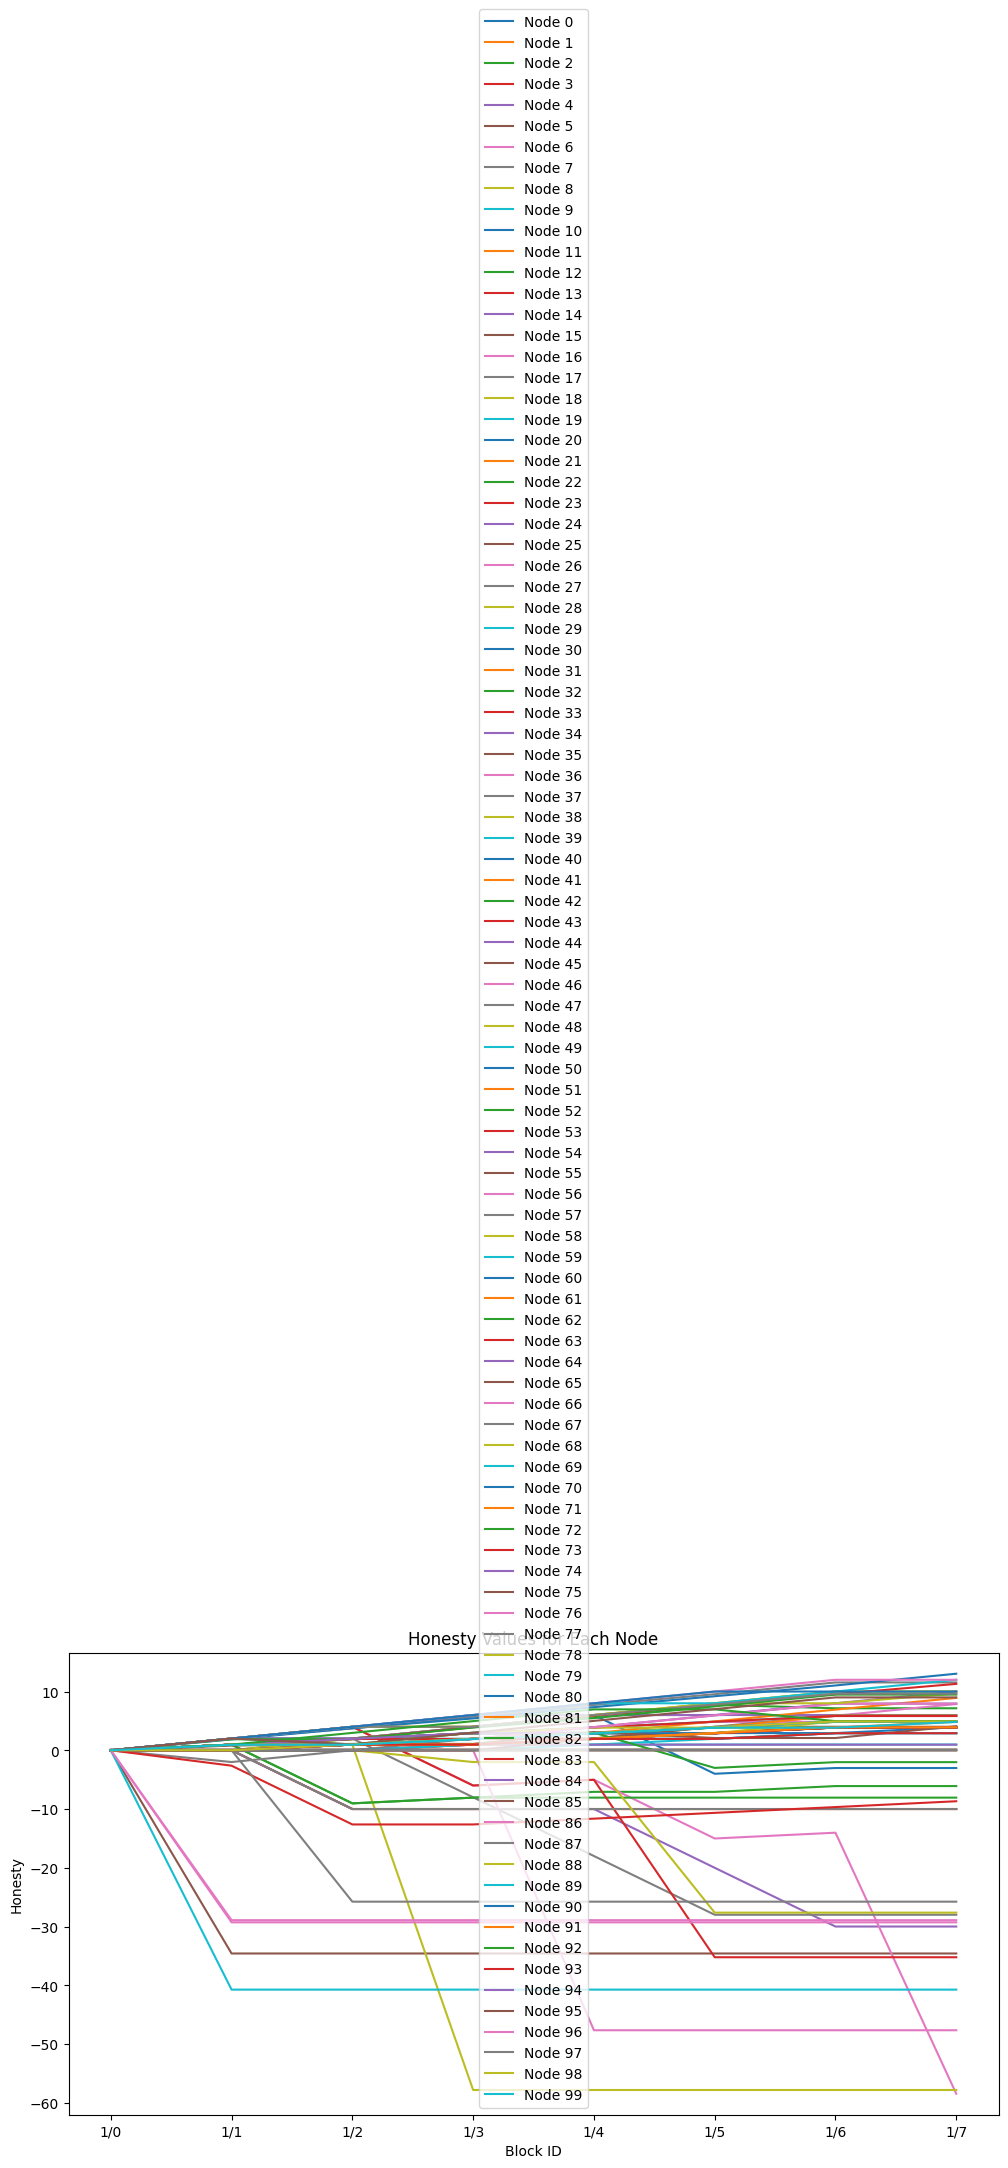

In [18]:
import matplotlib.pyplot as plt

# Specify the node IDs you want to include on the plot
# specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, honesty_values, label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
# plt.xticks(rotation=45)

# y_ticks = np.arange(-15, 11, 1)
# y_tick_labels = [f'{tick:.0f}' for tick in y_ticks]
# plt.yticks(y_ticks, y_tick_labels)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()

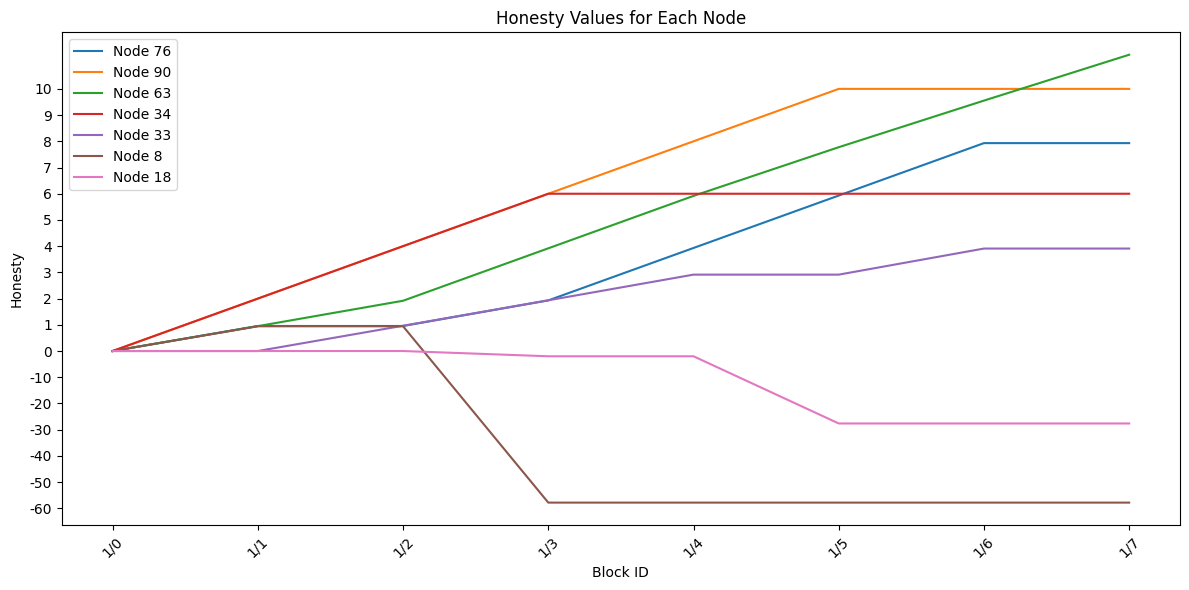

In [21]:
y = [-6,-5,-4,-3, -2, -1, 0,1,2,3,4,5,6,7,8,9,10]
y_ticks = [-60,-50,-40,-30, -20,-10, 0,1,2,3,4,5,6,7,8,9,10]  # Custom y-axis tick values


def process_y_values(y_values):
    return [y / 10 if y < 0 else y for y in y_values]



specific_node_ids = [76,90,63,34,33,8,18]  

# Prepare data for plotting
# node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in specific_node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, process_y_values(honesty_values), label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(y, y_ticks)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()